# CME 193 - Lecture 4

- Random numbers and histograms
- Power method walkthrough
- Linear algebra functions


## Random numbers

see [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [14]:
import numpy as np

In [18]:
import numpy.linalg as la

In [1]:
import numpy.random as rng

In [2]:
import matplotlib.pyplot as plt

In [3]:
rng.randint(-10,10)

-8

In [4]:
rng.choice([0,2,4,5], p=[0.8, 0.1, 0.0, 0.1])

0

### Histograms

In [5]:
x1 = rng.normal(2,3,1000)
x2 = rng.normal(1,5,1000)

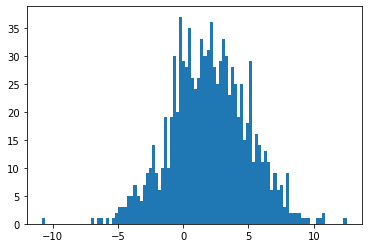

In [6]:
plt.hist(x1,bins=100);

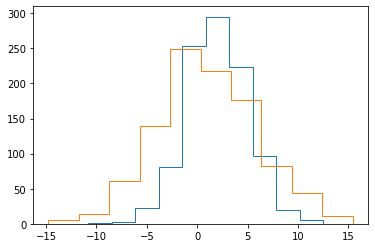

In [7]:
plt.hist(x1,histtype='step');
plt.hist(x2,histtype='step');

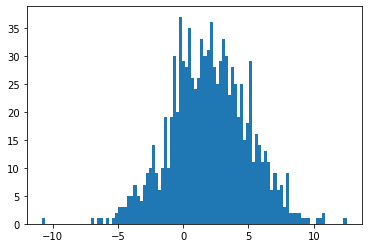

In [8]:
plt.hist(x1,bins=100);

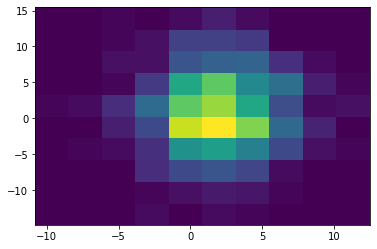

In [9]:
plt.hist2d(x1,x2);

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged:
        v <- A v
        v <- v / ||v||_2
        l <- v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [11]:
# Build a 10x10 matrix with random elements
A = rng.randn(10,10)
A

array([[ 0.10915397,  1.37834118, -0.06778324, -0.36871228, -0.76335815,
         0.20338152, -1.78078476, -0.33616052, -1.33621437, -0.84551718],
       [-1.01003008, -0.25830771, -0.16792936,  0.79025791, -0.6998207 ,
         1.22064642,  0.81399122,  0.29782691,  0.48639968, -0.29235818],
       [-0.71485128, -0.6659414 ,  2.10146622,  0.24673327, -1.23183914,
        -0.22786444, -0.85918728, -0.70461675, -0.44876023,  1.5407439 ],
       [ 0.61489982, -0.48019441, -1.08884676, -1.00861735, -1.25263235,
        -0.82452154,  0.19242248, -0.94873366,  0.15356091, -0.73097889],
       [-0.14282695,  0.33314345, -0.41956071,  1.08953118,  0.11664555,
         0.64487736, -0.97857788, -0.83776003, -0.39991652,  1.11631907],
       [ 0.15088736,  1.02775248, -1.37093293,  0.69020406,  0.06299308,
         1.55720944, -0.37131543, -1.01482934, -0.26543515,  1.60673187],
       [-0.3667578 , -0.16969188, -0.89302045, -0.29912972,  1.41552336,
        -0.02989805,  0.81893675, -0.84746459

In [12]:
# Make the matrix symmetric
A = (A + A.T)/2
A

array([[ 0.10915397,  0.18415555, -0.39131726,  0.12309377, -0.45309255,
         0.17713444, -1.07377128,  0.58127143, -0.29317614, -0.1492096 ],
       [ 0.18415555, -0.25830771, -0.41693538,  0.15503175, -0.18333863,
         1.12419945,  0.32214967, -0.25417761,  0.37469696, -0.16484589],
       [-0.39131726, -0.41693538,  2.10146622, -0.42105675, -0.82569992,
        -0.79939869, -0.87610387,  0.75380352,  0.02518202,  0.95691149],
       [ 0.12309377,  0.15503175, -0.42105675, -1.00861735, -0.08155059,
        -0.06715874, -0.05335362, -0.10447629, -0.45432549, -0.03459313],
       [-0.45309255, -0.18333863, -0.82569992, -0.08155059,  0.11664555,
         0.35393522,  0.21847274, -0.37035743, -0.0419343 ,  0.43386241],
       [ 0.17713444,  1.12419945, -0.79939869, -0.06715874,  0.35393522,
         1.55720944, -0.20060674, -0.46938396, -0.19712229,  1.46999542],
       [-1.07377128,  0.32214967, -0.87610387, -0.05335362,  0.21847274,
        -0.20060674,  0.81893675, -0.367163  

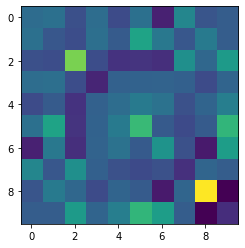

In [13]:
# Show the matrix to visualize the symmetry
plt.imshow(A)

In [15]:
X = np.ones((5,5))

In [16]:
def power_method(A, tol=1e-5):
    """
    Power method
    Arguments:
        A: symmetric matrix
        tol: tolerance
    """
    n = A.shape[0]
    v = rng.randn(n)
    ls = [1,2]
    while abs(ls[-1] - ls[-2]) > tol:
        v = A @ v
        v /= np.sqrt(np.sum(v*v))
        ls += [v @ A @ v]
    return ls[-1]

In [17]:
power_method(A, tol=1e-5)

4.4318044114992965

# Linear Algebra in NumPy

We'll start with 
```python
import numpy.linalg as la
```
`numpy` is the *package*.  `linalg` is a *module* in the package.

You can find a full list of available operations/decompositions in [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

In [19]:
# Example of Singular Value Decomposition (SVD)
A = np.random.normal(0, 1, (2,3))
U, S, V = la.svd(A)
print("A = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A = 
 [[-1.06481037 -1.17215707 -0.87015494]
 [ 1.42231519  0.63263265  0.40739508]]
U = 
 [[-0.75111918  0.66016663]
 [ 0.66016663  0.75111918]]
S = 
 [2.3578321  0.54290518]
V = 
 [[ 0.73744204  0.55053649  0.39126565]
 [ 0.67300139 -0.55007114 -0.49446018]
 [ 0.05699444 -0.62795805  0.77615741]]


In [20]:
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0, 2.0])
b = A @ x
# x2 <- A \ b
x2 = la.solve(A, b)
print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]
